# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
- Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

In [2]:
#Data Import: Import the dataset into a statistical software tool such as Python or R.

import pandas as pd 
import matplotlib as plt
import seaborn as sns

df =pd.read_csv(r"C:\Users\Admin\ml-project-unsupervised-learning\Wholesale_Data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [8]:
df.count()  # counts the number of non-NA values

Channel             440
Region              440
Fresh               440
Milk                440
Grocery             440
Frozen              440
Detergents_Paper    440
Delicassen          440
dtype: int64

In [9]:
#Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
# Count of null values in each column
null_counts = df.isnull().sum()

# Count of zero values in each column
zero_counts = (df == 0).sum()

print("Null Counts:")
print(null_counts)

print("\nZero Counts:")
print(zero_counts)

Null Counts:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

Zero Counts:
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64


In [11]:
# Check for very large values (greater than 1000000)
very_large_mask = df > 1000000

# Check for negative values
negative_mask = df < 0

# Applying the masks to the DataFrame to get rows with very large or negative values
very_large_values_df = df[very_large_mask.any(axis=1)]
negative_values_df = df[negative_mask.any(axis=1)]

# Printing the results
print("Rows with very large values:")
print(very_large_values_df)

print("\nRows with negative values:")
print(negative_values_df)




Rows with very large values:
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []

Rows with negative values:
Empty DataFrame
Columns: [Channel, Region, Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen]
Index: []


In [12]:
#Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
def get_unique(df):
    unique_values = {}
    for column in df:
        unique_values[column] = df[column].unique().tolist()
    return unique_values

get_unique(df)



{'Channel': [2, 1],
 'Region': [3, 1, 2],
 'Fresh': [12669,
  7057,
  6353,
  13265,
  22615,
  9413,
  12126,
  7579,
  5963,
  6006,
  3366,
  13146,
  31714,
  21217,
  24653,
  10253,
  1020,
  5876,
  18601,
  7780,
  17546,
  5567,
  31276,
  26373,
  22647,
  16165,
  9898,
  14276,
  4113,
  43088,
  18815,
  2612,
  21632,
  29729,
  1502,
  688,
  29955,
  15168,
  4591,
  56159,
  24025,
  19176,
  10850,
  630,
  9670,
  5181,
  3103,
  44466,
  11519,
  4967,
  6269,
  3347,
  40721,
  491,
  27329,
  5264,
  4098,
  5417,
  13779,
  6137,
  8590,
  35942,
  7823,
  9396,
  4760,
  85,
  9,
  19913,
  2446,
  8352,
  16705,
  18291,
  4420,
  19899,
  8190,
  20398,
  717,
  12205,
  10766,
  1640,
  7005,
  219,
  10362,
  20874,
  11867,
  16117,
  22925,
  43265,
  7864,
  24904,
  11405,
  12754,
  9198,
  11314,
  5626,
  3,
  23,
  403,
  503,
  9658,
  11594,
  1420,
  2932,
  56082,
  14100,
  15587,
  1454,
  8797,
  1531,
  1406,
  11818,
  12579,
  19046,
  1443

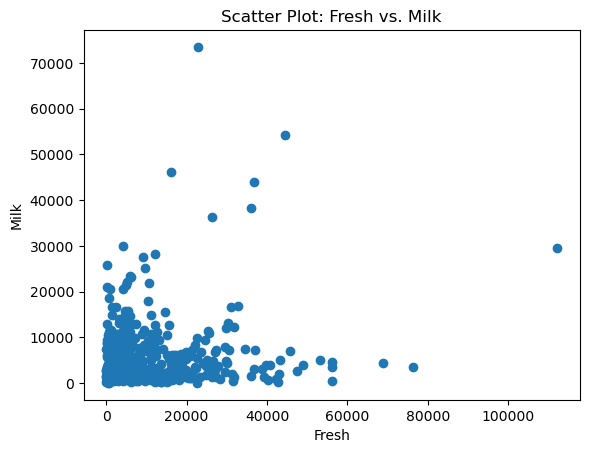

In [19]:
import matplotlib.pyplot as plt

# Scatter plot between "Fresh" and "Milk" variables
plt.scatter(df["Fresh"], df["Milk"])
plt.xlabel("Fresh")
plt.ylabel("Milk")
plt.title("Scatter Plot: Fresh vs. Milk")
plt.show()


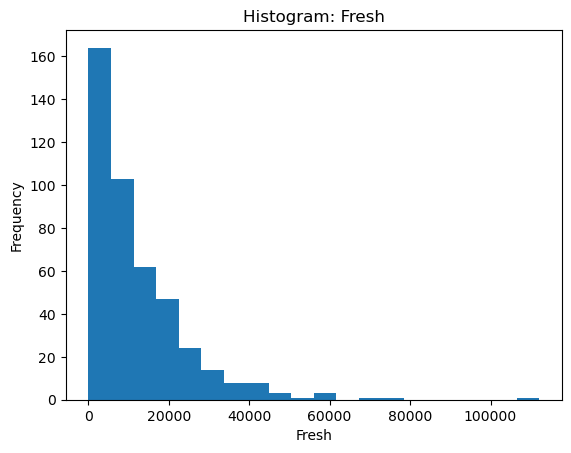

In [20]:
# Histogram for the "Fresh" column
plt.hist(df["Fresh"], bins=20)
plt.xlabel("Fresh")
plt.ylabel("Frequency")
plt.title("Histogram: Fresh")
plt.show()


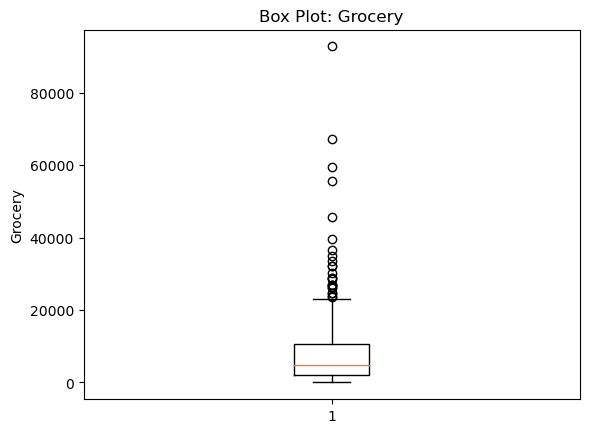

In [21]:
# Box plot for the "Grocery" column
plt.boxplot(df["Grocery"])
plt.ylabel("Grocery")
plt.title("Box Plot: Grocery")
plt.show()


grocery cat has outliers as seen by this viz and statistics summary

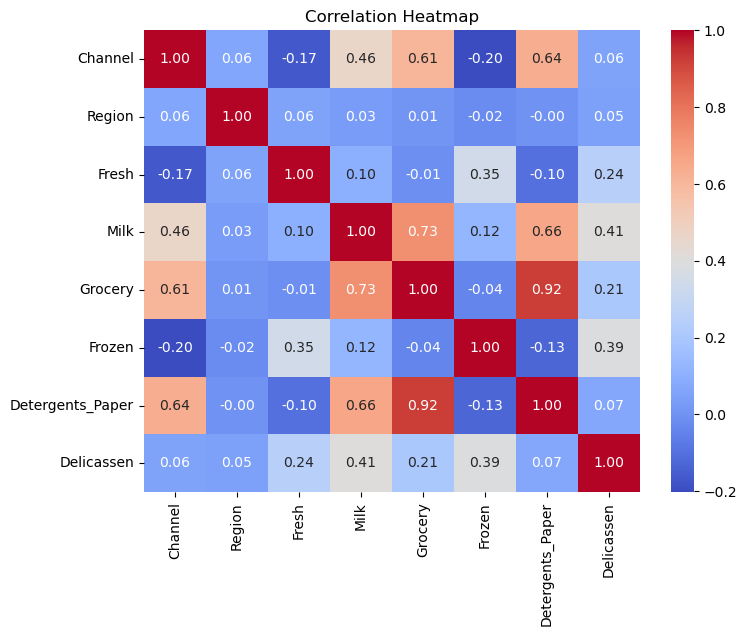

In [22]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [30]:
import numpy as np

In [32]:

z_scores = zscore(df)

# Create a DataFrame with Z-scores and the corresponding column names
z_scores_df = pd.DataFrame(z_scores, columns=df.columns, index=df.index)

# Identify potential outliers by checking if the absolute Z-score is greater than 3 (you can adjust the threshold as needed)
potential_outliers_mask = np.abs(z_scores_df) > 3
outliers_count = potential_outliers_mask.sum()

print("Count of Potential Outliers:")
print(outliers_count)

Count of Potential Outliers:
Channel              0
Region               0
Fresh                7
Milk                 9
Grocery              7
Frozen               6
Detergents_Paper    10
Delicassen           4
dtype: int64


In [25]:
# Calculate the correlation between different variables
correlation_matrix = df.corr()

# Print the correlation values for specific columns, e.g., "Grocery" and "Detergents_Paper"
print("Correlation between 'Grocery' and 'Detergents_Paper':", correlation_matrix.loc["Grocery", "Detergents_Paper"])


Correlation between 'Grocery' and 'Detergents_Paper': 0.9246406908542676


high intercollinearity b/w Grocery and Detergetns_Paper , likely because Detergents_paper is within the Grocery category. 
DP also has more outliers than any other col , so will remove it for modelling.

In [37]:

cm = df.corr()

def get_correlation_between_pairs(df):
    correlation_matrix = cm
    columns = df.columns

    # Create a dictionary to store the correlation values for each pair of columns
    correlation_values = {}

    # Calculate the correlation between each pair of columns (except 'Channel' and 'Region')
    for i in range(len(columns)):
        for j in range(i + 1, len(columns)):
            column1 = columns[i]
            column2 = columns[j]

            # Skip 'Channel' and 'Region' columns
            if column1 in ['Channel', 'Region'] or column2 in ['Channel', 'Region']:
                continue

            correlation = correlation_matrix.loc[column1, column2]
            correlation_values[f"{column1} vs. {column2}"] = correlation

    return correlation_values

correlation_values = get_correlation_between_pairs(df)

# Print the correlation values for each pair of columns (except 'Channel' and 'Region')
for pair, correlation in correlation_values.items():
    print(f"Correlation between {pair}: {correlation}")


Correlation between Fresh vs. Milk: 0.10050976829985843
Correlation between Fresh vs. Grocery: -0.011853874984010478
Correlation between Fresh vs. Frozen: 0.34588145710907986
Correlation between Fresh vs. Detergents_Paper: -0.10195293825378433
Correlation between Fresh vs. Delicassen: 0.24468996945659088
Correlation between Milk vs. Grocery: 0.7283351181536434
Correlation between Milk vs. Frozen: 0.12399375879489047
Correlation between Milk vs. Detergents_Paper: 0.6618156793591072
Correlation between Milk vs. Delicassen: 0.4063683161768711
Correlation between Grocery vs. Frozen: -0.040192736990591255
Correlation between Grocery vs. Detergents_Paper: 0.9246406908542684
Correlation between Grocery vs. Delicassen: 0.20549651097954497
Correlation between Frozen vs. Detergents_Paper: -0.13152490600960584
Correlation between Frozen vs. Delicassen: 0.39094746527393676
Correlation between Detergents_Paper vs. Delicassen: 0.06929129745837395


In [39]:
df_clean = df.drop("Detergents_Paper", axis=1)

In [40]:
from sklearn.preprocessing import StandardScaler

# Standardize the data (excluding categorical columns like "Channel" and "Region")
numerical_cols = ["Fresh", "Milk", "Grocery", "Frozen",  "Delicassen"]
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


# Part II - KMeans Clustering

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

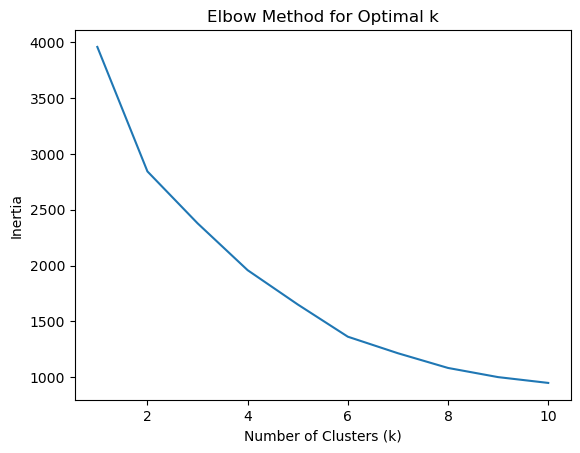

In [67]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters (using the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

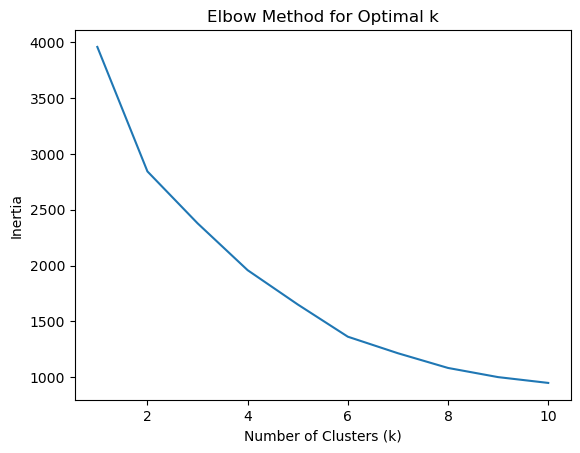

In [66]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Determine the optimal number of clusters (using the elbow method)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), inertia)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()



c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


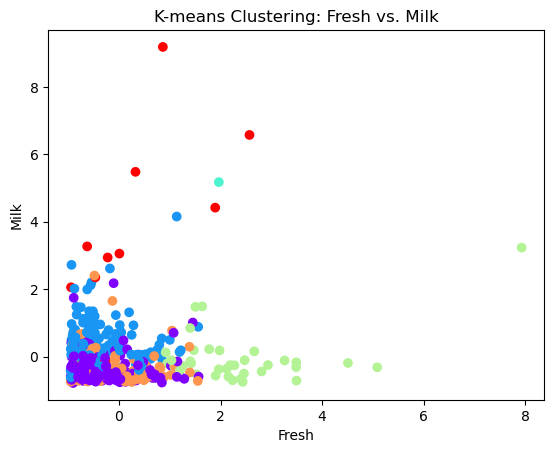

In [42]:
# Apply k-means clustering with the chosen k
kmeans = KMeans(n_clusters=6, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_data)

# Add the cluster labels back to the original DataFrame
df['Cluster'] = cluster_labels

# Visualization and interpretation
# You can visualize the clusters using scatter plots or any other relevant visualization techniques.
# Additionally, you can analyze the characteristics of each cluster to interpret the results.

# For example, to visualize clusters for the first two features 'Fresh' and 'Milk':
plt.scatter(df['Fresh'], df['Milk'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('K-means Clustering: Fresh vs. Milk')
plt.show()



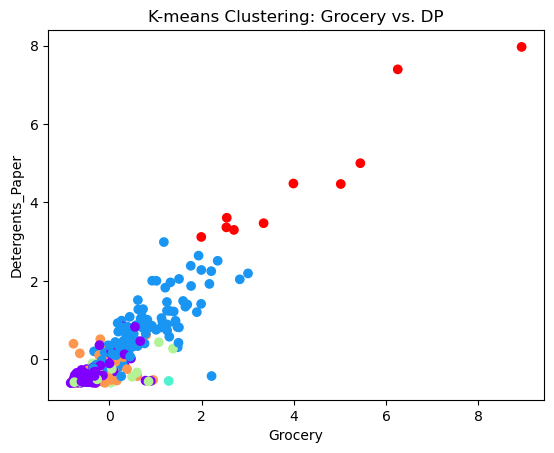

In [46]:
plt.scatter(df['Grocery'], df['Detergents_Paper'], c=df['Cluster'], cmap='rainbow')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.title('K-means Clustering: Grocery vs. DP')
plt.show()

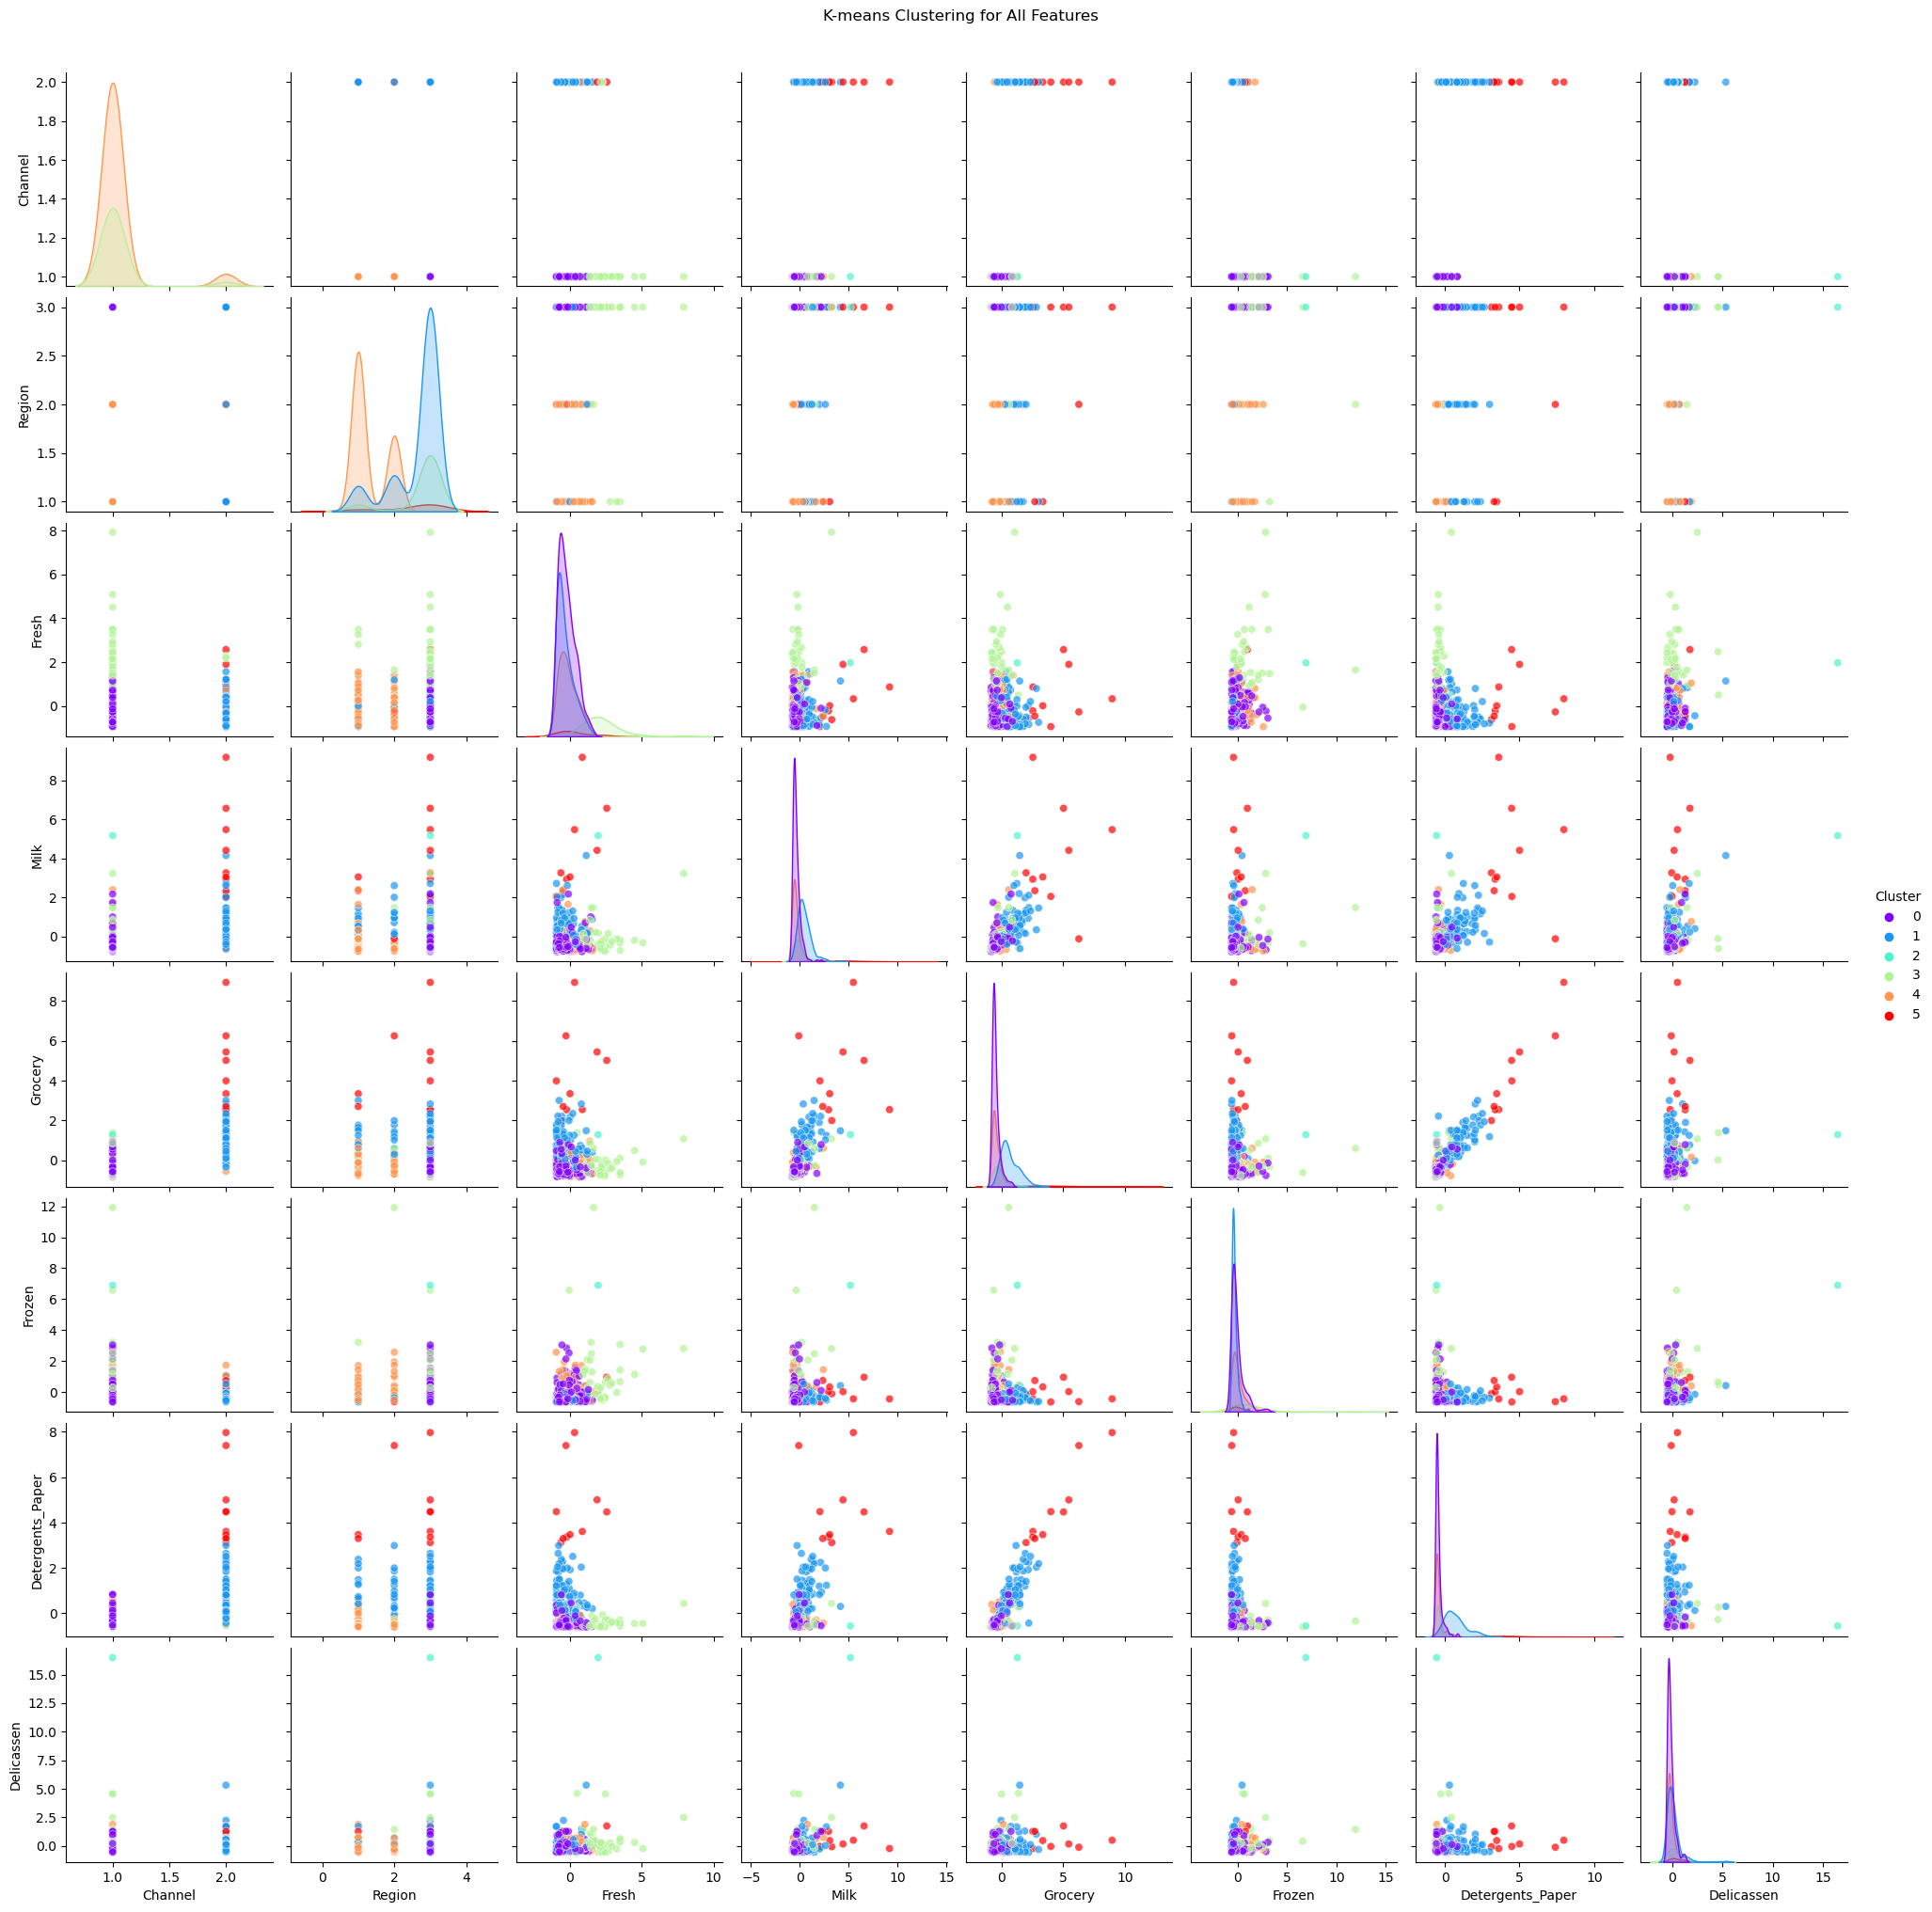

In [48]:
# Add the cluster labels back to the original DataFrame
df['Cluster'] = cluster_labels

# Visualization
# Create a pairplot to visualize clustering for all feature combinations
sns.pairplot(df, hue='Cluster', palette='rainbow', plot_kws={'alpha': 0.7})
plt.suptitle('K-means Clustering for All Features', y=1.02)
plt.show()

# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

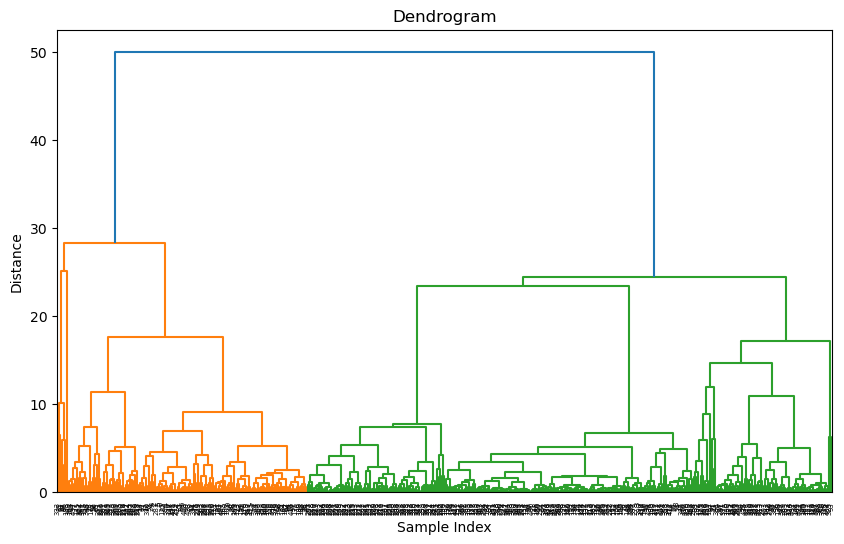

In [64]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt



# Drop the categorical columns ('Channel' and 'Region') as hierarchical clustering works with numerical data
# numerical_cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
# X = df[numerical_cols]

# Standardize the numerical data
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

# Create a dendrogram to determine the optimal number of clusters
linked = linkage(scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


# Based on the dendrogram, identify the optimal number of clusters

# Perform hierarchical clustering with the chosen number of clusters
n_clusters = 6 # Replace this with the chosen number of clusters from the dendrogram
hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = hierarchical_clustering.fit_predict(scaled)

# Add the cluster labels back to the original DataFrame
df['Cluster'] = cluster_labels

# You can now use df['Cluster'] to analyze and visualize the clustering results

In [55]:
df['Cluster'].unique()

array([2, 5, 0, 1, 4, 3], dtype=int64)

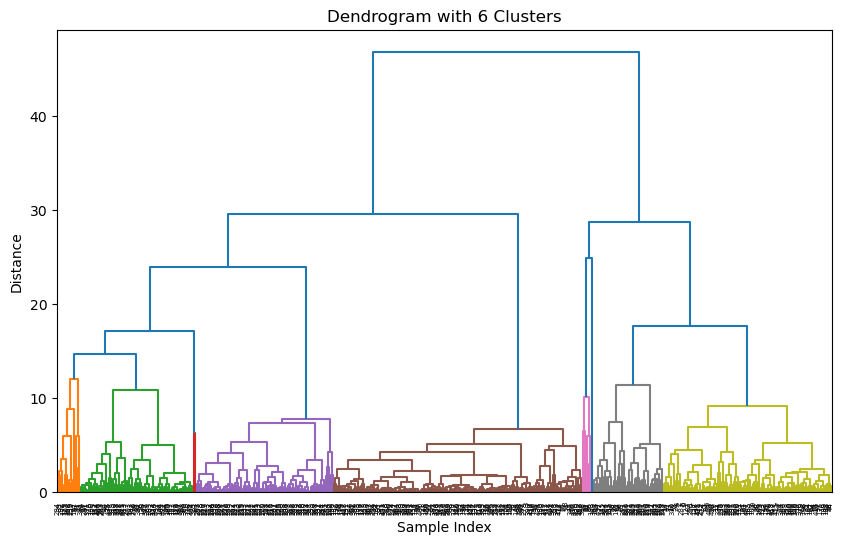

In [69]:
# Set a random seed for reproducibility
np.random.seed(42)

# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Create a dendrogram with 6 clusters
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, color_threshold=12, orientation='top', labels=df.index, distance_sort='descending', show_leaf_counts=True)
plt.title("Dendrogram with 6 Clusters")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

In [61]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming you have a DataFrame named 'df' with the columns 'Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', and 'Delicassen'



# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
pca.fit(X_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Determine the number of principal components that explain a significant portion of the variance (e.g., 95%)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Perform PCA with the chosen number of components
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(n_components)])



In [62]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,1.395568,-0.601632,-0.823267,-1.000956,0.545526,-0.478642
1,1.579859,-0.544124,-0.714226,-0.694584,0.886106,-0.162448
2,1.707772,0.641384,-0.690833,-0.262759,2.037159,-1.237270
3,-1.441639,0.626870,-0.483753,0.436481,0.009787,0.463673
4,1.174835,0.843135,-0.852644,-1.412246,1.033848,-0.864632
...,...,...,...,...,...,...
435,0.158833,2.466689,-0.381451,-0.360401,-0.565213,1.119685
436,-1.139583,1.399169,-0.827190,-1.327793,-0.886246,-0.537934
437,4.079315,-0.273701,-0.497178,0.334273,-0.855988,0.123608
438,-1.469065,-0.042258,-0.594651,0.695332,-0.011965,-0.412574


In [63]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.model_selection import GridSearchCV

# Standardize the numerical data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Define the parameter grid for grid search
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6],  # Try different numbers of clusters
}

# Perform grid search with KMeans
kmeans = KMeans(random_state=42)
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5)
grid_search.fit(X_pca)

# Get the best number of clusters from grid search
best_n_clusters_kmeans = grid_search.best_params_['n_clusters']

# Perform hierarchical clustering with the chosen number of clusters
hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters_kmeans)
hierarchical_labels = hierarchical_clustering.fit_predict(X_pca)

# Compare the clustering results
print("KMeans Clustering with PCA:")
print(grid_search.best_estimator_)
print("Hierarchical Clustering:")
print(hierarchical_clustering)

# Now you can analyze and compare the results of KMeans and hierarchical clustering


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

KMeans Clustering with PCA:
KMeans(n_clusters=6, random_state=42)
Hierarchical Clustering:
AgglomerativeClustering(n_clusters=6)


c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


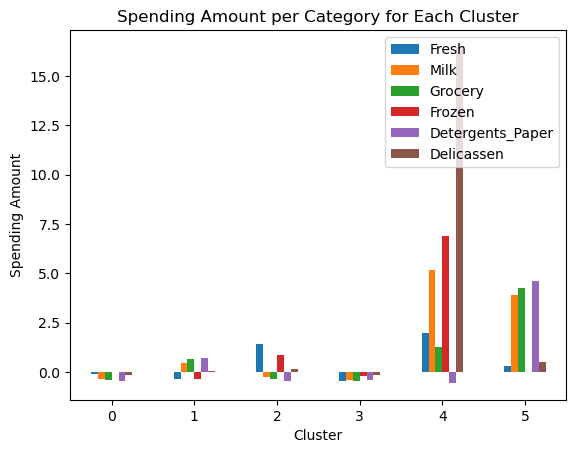

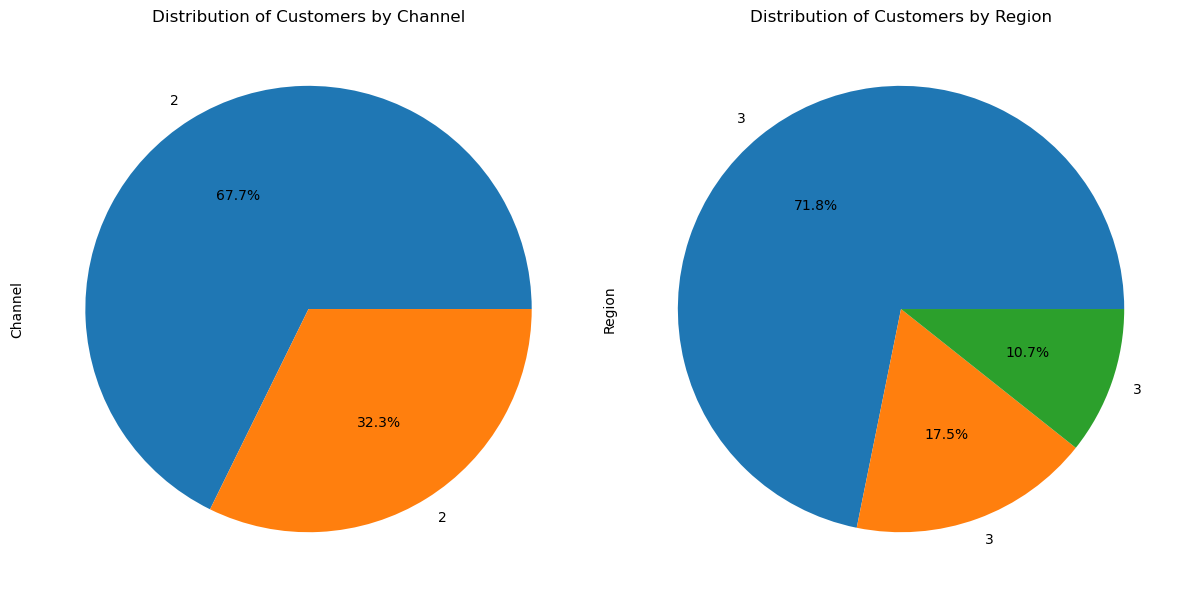

In [72]:
# Assuming you have performed KMeans clustering or hierarchical clustering and obtained the cluster assignments
# For example, with KMeans clustering, you have the following:
kmeans_model = KMeans(n_clusters=6, random_state=42)
kmeans_labels = kmeans_model.fit_predict(X_scaled)

# Assign the cluster labels to the original DataFrame
df['Cluster'] = kmeans_labels

# Explore cluster characteristics
cluster_characteristics = df.groupby('Cluster').mean()

# Visualize spending amounts per category for each cluster
cluster_characteristics[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Spending Amount')
plt.title('Spending Amount per Category for Each Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()


# Visualize the distribution of customers in each channel and region across clusters
plt.figure(figsize=(12, 6))
plt.subplot(121)
df['Channel'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=df['Channel'])
plt.title('Distribution of Customers by Channel')

plt.subplot(122)
df['Region'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=df['Region'])
plt.title('Distribution of Customers by Region')

plt.tight_layout()
plt.show()


# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

- Ideal clustering of data is with 6 groups , meaning that we can group the customers into 6 different groups based an each customer's annula spending and different categories
- As observed in the boxplot viz for grocery category , there are huge disparites in customer spending in that category. This can be explained by different customer account holder ids - some may be for large families and institutions ex.schools while other may be for individuals purchasing only for themsleves. Further research into customer demographics would allow for a deeper exploration.
- Cluster 4 seems to have the higest spenidng on all categories. FUrther research on customer demographics , coupon codes used - if any , store region and shopping channel will allow us to see how we can reproduce such customer behaviour across all geoups
- Would be intersting to trun this into a supervised regression model , seeing if can predict amount spent per categroy based on other feautres. WOuld need more feeautres about each customer to perform a robust regression model.